In [6]:
using Distributions

In [7]:
using PyPlot

Let's take the AR(1) model with $\phi = 0.8$. 

$$
x_{t} = \phi x_{t-1} + \varepsilon_{t}
$$

In [8]:
T = 100
ϕ = 0.92
ε = randn(T);

In [9]:
?randn

search: randn ZeroMeanDiagNormal ZeroMeanDiagNormalCanon rand transcode



```
randn([rng=GLOBAL_RNG], [T=Float64], [dims...])
```

Generate a normally-distributed random number of type `T` with mean 0 and standard deviation 1. Optionally generate an array of normally-distributed random numbers. The `Base` module currently provides an implementation for the types [`Float16`](@ref), [`Float32`](@ref), and [`Float64`](@ref) (the default), and their [`Complex`](@ref) counterparts. When the type argument is complex, the values are drawn from the circularly symmetric complex normal distribution of variance 1 (corresponding to real and imaginary part having independent normal distribution with mean zero and variance `1/2`).

# Examples

```jldoctest
julia> using Random

julia> rng = MersenneTwister(1234);

julia> randn(rng, ComplexF64)
0.6133070881429037 - 0.6376291670853887im

julia> randn(rng, ComplexF32, (2, 3))
2×3 Array{Complex{Float32},2}:
 -0.349649-0.638457im  0.376756-0.192146im  -0.396334-0.0136413im
  0.611224+1.56403im   0.355204-0.365563im  0.0905552+1.31012im
```


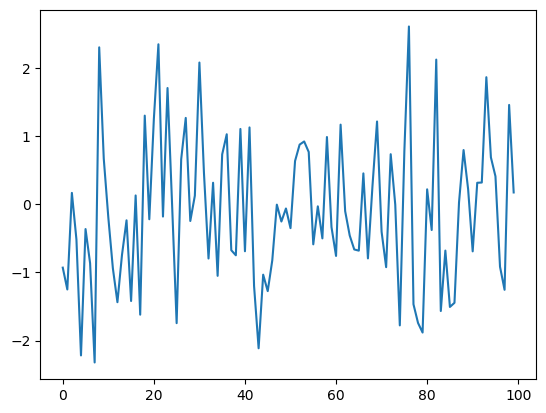

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fb090dc4750>

In [10]:
plot(ε)

In [11]:
x = zeros(T);

In [12]:
x[1] = 0.0

0.0

In [13]:
for t = 2:T
    x[t] = ϕ * x[t-1] + ε[t]
end

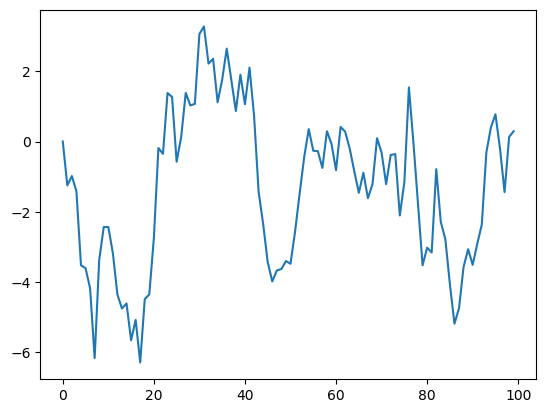

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fb0d8c80e50>

In [14]:
plot(x)

In [23]:
x

100-element Array{Float64,1}:
 -0.44430338139044856
 -0.6031034501654645 
  0.19873012728228578
  1.781139744664146  
  1.8680043994278448 
  1.8894457993810296 
  3.0731500195318535 
  4.654378862392107  
  3.687744336099994  
  4.257317397855252  
  2.955351787430896  
  4.4386383078461735 
  3.6872894516838075 
  ⋮                  
 -0.45008348656554814
  0.5969991584412011 
  0.8942121555404727 
 -0.504168859154998  
 -0.38760454673598466
 -0.19138768532332207
 -1.007735833350018  
 -0.8085135125133347 
 -0.30534348513152965
 -0.34116696439229227
 -0.1574813688188944 
 -0.3894405257508269 

In [33]:
function linregress(y, X)
    β = X \ y
    yhat = β * X
    resids = y - yhat
    return(β, resids)
end

linregress (generic function with 1 method)

In [34]:
a = x[1:T-1];
b = x[2:end];

In [17]:
w = floor(rand(5) * 100)

MethodError: MethodError: no method matching floor(::Array{Float64,1})
Closest candidates are:
  floor(!Matched::Type{BigInt}, !Matched::BigFloat) at mpfr.jl:318
  floor(!Matched::Missing; sigdigits, digits, base) at missing.jl:140
  floor(!Matched::Dates.Date, !Matched::Dates.Day) at /Users/sabae/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.3/Dates/src/rounding.jl:69
  ...

In [29]:
?randint

search: ZeroMeanDiagNormal ZeroMeanDiagNormalCanon TriangularDist

Couldn't find randint
Perhaps you meant randn, rand, rounding or range


No documentation found.

Binding `randint` does not exist.


In [18]:
rand(Int64, lower=1, upper=10, 5)

ErrorException: function rand does not accept keyword arguments

In [19]:
?rand

search: rand randn transcode ZeroMeanDiagNormal ZeroMeanDiagNormalCanon



```
rand([rng=GLOBAL_RNG], [S], [dims...])
```

Pick a random element or array of random elements from the set of values specified by `S`; `S` can be

  * an indexable collection (for example `1:9` or `('x', "y", :z)`),
  * an `AbstractDict` or `AbstractSet` object,
  * a string (considered as a collection of characters), or
  * a type: the set of values to pick from is then equivalent to `typemin(S):typemax(S)` for integers (this is not applicable to [`BigInt`](@ref)), to $[0, 1)$ for floating point numbers and to $[0, 1)+i[0, 1)]$ for complex floating point numbers;

`S` defaults to [`Float64`](@ref).

!!! compat "Julia 1.1"
    Support for `S` as a tuple requires at least Julia 1.1.


# Examples

```julia-repl
julia> rand(Int, 2)
2-element Array{Int64,1}:
 1339893410598768192
 1575814717733606317

julia> using Random

julia> rand(MersenneTwister(0), Dict(1=>2, 3=>4))
1=>2
```

!!! note
    The complexity of `rand(rng, s::Union{AbstractDict,AbstractSet})` is linear in the length of `s`, unless an optimized method with constant complexity is available, which is the case for `Dict`, `Set` and `BitSet`. For more than a few calls, use `rand(rng, collect(s))` instead, or either `rand(rng, Dict(s))` or `rand(rng, Set(s))` as appropriate.


---

```
rand([rng::AbstractRNG,] s::Sampleable)
```

Generate one sample for `s`.

```
rand([rng::AbstractRNG,] s::Sampleable, n::Int)
```

Generate `n` samples from `s`. The form of the returned object depends on the variate form of `s`:

  * When `s` is univariate, it returns a vector of length `n`.
  * When `s` is multivariate, it returns a matrix with `n` columns.
  * When `s` is matrix-variate, it returns an array, where each element is a sample matrix.

    rand([rng::AbstractRNG,] s::Sampleable, dim1::Int, dim2::Int...)   rand([rng::AbstractRNG,] s::Sampleable, dims::Dims)

Generate an array of samples from `s` whose shape is determined by the given dimensions.

---

```
rand(rng::AbstractRNG, d::UnivariateDistribution)
```

Generate a scalar sample from `d`. The general fallback is `quantile(d, rand())`.

---

```
rand(rng, d)
```

Extract a sample from the p-Generalized Gaussian distribution 'd'. The sampling procedure is implemented from from [1]. [1]  Gonzalez-Farias, G., Molina, J. A. D., & Rodríguez-Dagnino, R. M. (2009). Efficiency of the approximated shape parameter estimator in the generalized Gaussian distribution. IEEE Transactions on Vehicular Technology, 58(8), 4214-4223.

---

```
rand(::AbstractRNG, ::Distributions.AbstractMvNormal)
```

Sample a random vector from the provided multi-variate normal distribution.

---

```
rand(::AbstractRNG, ::Sampleable)
```

Samples from the sampler and returns the result.

---

```
rand(d::Union{UnivariateMixture, MultivariateMixture})
```

Draw a sample from the mixture model `d`.

```
rand(d::Union{UnivariateMixture, MultivariateMixture}, n)
```

Draw `n` samples from `d`.


In [20]:
w = sample(1:10, 5)

5-element Array{Int64,1}:
  6
 10
  4
  6
  6

In [41]:
z = w[4:5]

2-element Array{Int64,1}:
 9
 5

In [36]:
# Now the econometrician takes over
β_hat, resids = linregress(a, b);

In [37]:
# Let's parametric Mone Carlo
function parametric_Monte_Carlo(ϕ, obs, init)
    z = randn(obs);
    y = zeros(obs);
    y[1] = init

    for t = 2:obs 
        y[t] = ϕ * y[t-1] + z[t]
    end
    
    return y
end

parametric_Monte_Carlo (generic function with 1 method)

In [38]:
M = 10_000

10000

In [39]:
Y = zeros(M)

for j in 1:M
    path = parametric_Monte_Carlo(β_hat, T, 0.0)
    Y[j] = path[end]
end

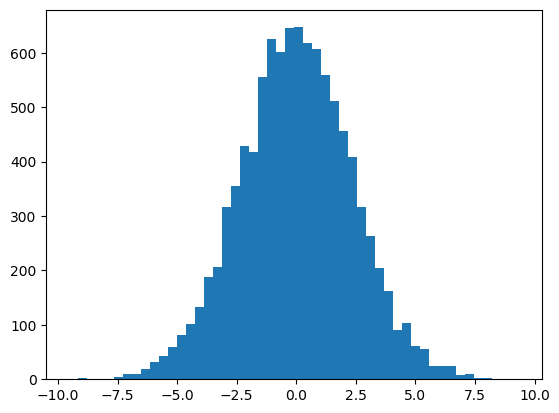

In [40]:
hist(Y, bins=50);

In [47]:
# Let's parametric Mone Carlo
function parametric_Bootstrap(ϕ, resids, obs, init)
    z = sample(resids, obs)
    y = zeros(obs);
    y[1] = init

    for t = 2:obs 
        y[t] = ϕ * y[t-1] + z[t]
    end
    
    return y
end

parametric_Bootstrap (generic function with 1 method)

In [48]:
X = zeros(M);

In [50]:
for j in 1:M
    path = parametric_Bootstrap(β_hat, resids, T, 0.0)
    X[j] = path[end]
end

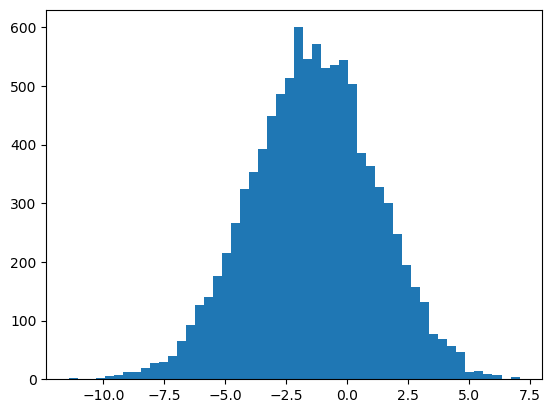

In [51]:
hist(X, bins=50);